# Ford GoBike Dataset Exploration

# Table of Contents
* Introduction
* Data Wrangling
    1. Discovering
    2. Structuring
    3. Cleaning
    4. Enriching
    5. Validating
    6. Publishing
* Exploratory Data Analysis
    1. Univariate Exploration
    2. Bivariate Exploration
    3. Multivariate Exploration
* Conclusions
    1. Results
    2. Limitations

# Introduction

* the Dataset descripe individuals trips using Ford bike-sharing system in San Francisco Bay area.
* the Dataset consist of 16 columns and 183412 rows
* the Dataset columns include:
    * trip data - like trip duration in seconds, start/end time and bike id.
    * station data - like start/end station id, name, latitude, and  longitude.
    * member data - like user type, birth year, gender, and enrollment in Bike Share For All program.

first we are going to import the necessary liberaries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from plot_assist import *

# Data Wrangling

## 1. Discovering

In [2]:
df = pd.read_csv('data/201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
descrip_column(df['duration_sec'])

name: duration_sec
dtype: int64
null count: 0
unique: [52185 42521 61854 ... 13251  5713  2822]
unique count: 4752
max range: 85444
min range: 61
max frequncy: 311
min frequncy: 1


* this variable type is quantitative continuous
* this column has no missing values
* the max trip duration was about 85444 sec almost one day (86400 sec)
* the min trip duration was about 61 sec almost one minute (60 sec)

In [5]:
descrip_column(df['start_time'])

name: start_time
dtype: object
null count: 0
unique: ['2019-02-28 17:32:10.1450' '2019-02-28 18:53:21.7890'
 '2019-02-28 12:13:13.2180' ... '2019-02-01 00:06:05.5490'
 '2019-02-01 00:05:34.3600' '2019-02-01 00:00:20.6360']
unique count: 183401
max frequncy: 2
min frequncy: 1


* this variable type is quantitative continuous with seconds as threshold but it can be discrete by segregating it into years, monthes, days and hours , neglecting minutes and seconds as it will not really affect our analysis. will impliment that in the Structuring step.

* this column has no missing values

In [6]:
descrip_column(df['end_time'])

name: end_time
dtype: object
null count: 0
unique: ['2019-03-01 08:01:55.9750' '2019-03-01 06:42:03.0560'
 '2019-03-01 05:24:08.1460' ... '2019-02-01 00:08:27.2200'
 '2019-02-01 00:07:54.2870' '2019-02-01 00:04:52.0580']
unique count: 183397
max frequncy: 2
min frequncy: 1


* this variable type is quantitative continuous with seconds as threshold but it can be discrete by segregating it into years, monthes, days and hours , neglecting minutes and seconds as it will not really affect our analysis. will impliment that in the Structuring step.

* this column has no missing values

In [7]:
descrip_column(df['start_station_id'])

name: start_station_id
dtype: float64
null count: 197
unique: [ 21.  23.  86. 375.   7.  93. 300.  10.  19. 370.  44. 127. 252. 243.
 349. 131.  74. 321. 180.  72. 163. 190.   6.  78. 258. 238.  28. 109.
  98. 133. 113. 220. 122.  58.  87.  15. 104.  27.   9. 140. 310.  53.
 106. 340. 121.  11. 240.  61.  36.  34.  13. 345.  43. 239. 182. 119.
 369. 159. 254.  30. 356. 324.  71.  67. 250. 245. 377. 317. 219. 274.
  77. 129. 253. 386.  95. 183.   5. 137.  73. 176. 197. 136.  33.  59.
 115. 280. 262. 368. 385.  90. 112. 160.   4. 247.  97. 308.  75. 123.
 172. 114. 244.   8.  55.  31.  62. 125.  49. 194. 263. 120. 371. 107.
 144.  70.  47. 148. 383.  17. 281.  66.  76. 338.  92. 336. 155. 235.
 339. 323. 311. 141. 171. 350. 166. 223. 312. 380. 110. 181.  79.  16.
  39. 266. 246.  14.  88.   3. 154. 215. 126. 149.  89. 102. 294.  22.
 202. 198.  96. 256. 248.  60. 230. 277.  85.  80. 134. 105. 296. 285.
 158. 304.  81.  50. 269. 268. 150. 195. 249. 130.  99.  nan 270. 101.
 355.  52. 343.

* this variable type is quantitative discrete.
* this column has 197 missing values.
* the data type of this column is `float` which is not appropriate for describing ID. we should convert it to `int`

In [8]:
descrip_column(df['end_station_id'])

name: end_station_id
dtype: float64
null count: 197
unique: [ 13.  81.   3.  70. 222. 323. 312. 127. 121.  43. 343. 244. 252.  60.
  71. 336.  75. 180. 107. 221.  52. 269. 189. 196.  15.  78. 263.  50.
  73. 373. 133. 115.  96. 145. 122. 195.  19. 284.  93.  34.  58. 132.
 294. 377. 109. 216. 349.  11.  62. 138. 240. 118.  10.  53. 266. 197.
 163. 369. 159.  64. 386.  80. 259.   9.  86. 296. 219. 258. 134. 141.
 305. 144. 267. 137.  77. 209.  98.  67.  21. 119. 192. 360. 253.   4.
  27. 247. 310. 139. 147. 243. 241.  88. 230.  61. 398. 297. 371. 106.
 210. 136. 277.  95.  56. 129. 200.  16.  85.  72. 239.  92.  36. 356.
 193. 182. 123. 160.  49. 321.  17.  25.   6. 388. 126. 368. 113. 378.
 186.  74. 157. 104. 175. 223. 362. 238. 357.  55. 248.  63. 381.   5.
  30. 350. 158. 245. 250. 365. 385.  47.  28.  29. 375. 345.  44.  66.
 341. 364. 153. 120. 286. 339. 130.  90.  79. 203. 268. 285. 340.  26.
 254. 156. 370. 262. 311.  84.  23. 249.  33. 246. 152. 290. 151. 190.
 101.  89. 220. 3

* this variable type is quantitative discrete.
* same as `end_station_id` this column has 197 missing values.
* the data type of this column is `float` which is not appropriate for describing ID. we should convert it to `int`

In [9]:
len(symmetric_difference(df['start_station_id'].dropna(),df['end_station_id'].dropna()))

0

* by getting the symmetric difference between start stations IDs and end stations IDs we can notice that all stations available as start stations also available as end stations.

In [10]:
descrip_column(df['start_station_name'])

name: start_station_name
dtype: object
null count: 197
unique: ['Montgomery St BART Station (Market St at 2nd St)'
 'The Embarcadero at Steuart St' 'Market St at Dolores St'
 'Grove St at Masonic Ave' 'Frank H Ogawa Plaza'
 '4th St at Mission Bay Blvd S' 'Palm St at Willow St'
 'Washington St at Kearny St' 'Post St at Kearny St' 'Jones St at Post St'
 'Civic Center/UN Plaza BART Station (Market St at McAllister St)'
 'Valencia St at 21st St' 'Channing Way at Shattuck Ave'
 'Bancroft Way at College Ave' 'Howard St at Mary St'
 '22nd St at Dolores St' 'Laguna St at Hayes St' '5th St at Folsom'
 'Telegraph Ave at 23rd St' 'Page St at Scott St'
 'Lake Merritt BART Station' 'West St at 40th St'
 'The Embarcadero at Sansome St' 'Folsom St at 9th St'
 'University Ave at Oxford St' 'MLK Jr Way at University Ave'
 'The Embarcadero at Bryant St' '17th St at Valencia St'
 'Valencia St at 16th St' 'Valencia St at 22nd St' 'Franklin Square'
 'San Pablo Ave at MLK Jr Way' '19th St at Mission St'
 'M

* this variable type is categorical nominal.
* this column has 197 missing values.

In [11]:
descrip_column(df['end_station_name'])

name: end_station_name
dtype: object
null count: 197
unique: ['Commercial St at Montgomery St' 'Berry St at 4th St'
 'Powell St BART Station (Market St at 4th St)' 'Central Ave at Fell St'
 '10th Ave at E 15th St' 'Broadway at Kearny' 'San Jose Diridon Station'
 'Valencia St at 21st St' 'Mission Playground'
 'San Francisco Public Library (Grove St at Hyde St)'
 'Bryant St at 2nd St' 'Shattuck Ave at Hearst Ave'
 'Channing Way at Shattuck Ave' '8th St at Ringold St'
 'Broderick St at Oak St' 'Potrero Ave and Mariposa St'
 'Market St at Franklin St' 'Telegraph Ave at 23rd St'
 '17th St at Dolores St' '6th Ave at E 12th St (Temporary Location)'
 'McAllister St at Baker St' 'Telegraph Ave at Carleton St'
 'Genoa St at 55th St' 'Grand Ave at Perkins St'
 'San Francisco Ferry Building (Harry Bridges Plaza)'
 'Folsom St at 9th St' 'Channing Way at San Pablo Ave'
 '2nd St at Townsend St' 'Pierce St at Haight St'
 'Potrero del Sol Park (25th St at Utah St)' 'Valencia St at 22nd St'
 'Jackson Pl

* this variable type is categorical nominal.
* same as `end_station_name` this column has 197 missing values.

In [12]:
len(symmetric_difference(df['start_station_name'].dropna(),df['end_station_name'].dropna()))

0

* by getting the symmetric difference between start stations names and end stations names we can notice that all stations available as start stations also available as end stations.

In [13]:
descrip_column(df['start_station_latitude'])

name: start_station_latitude
dtype: float64
null count: 0
unique: [37.7896254  37.791464   37.7693053  37.77483629 37.80456235 37.7704074
 37.3172979  37.79539294 37.788975   37.78732677 37.7810737  37.7567083
 37.8658466  37.8693603  37.78100972 37.75500026 37.77643482 37.7801457
 37.8126783  37.772406   37.7973195  37.8302232  37.80477    37.7737172
 37.8723555  37.8717192  37.78716801 37.7633158  37.765052   37.7552126
 37.764555   37.8113514  37.760299   37.776619   37.769757   37.795392
 37.76704458 37.7880593  37.79857211 37.7478584  37.335885   37.775946
 37.7632417  37.849735   37.7592103  37.79728    37.8660431  37.7765126
 37.78383    37.7839879  37.794231   37.7664827  37.7787677  37.8688126
 37.8090126  37.7610471  37.78734902 37.8160598  37.88022245 37.776598
 37.76918818 37.78829998 37.7730627  37.7766392  37.873558   37.870139
 37.77191688 37.333955   37.8098236  37.8575672  37.7735069  37.758862
 37.86641794 37.75210498 37.7662185  37.8087021  37.78389936 37.750506
 37.

* this variable type is quantitative continuous.
* this column has no missing values.

In [14]:
descrip_column(df['end_station_latitude'])

name: end_station_latitude
dtype: float64
null count: 0
unique: [37.794231   37.77588    37.78637527 37.77331088 37.7927143  37.79801364
 37.329732   37.7567083  37.7592103  37.7787677  37.78317199 37.87367621
 37.8658466  37.7745204  37.7730627  37.76328094 37.77379321 37.8126783
 37.7630152  37.794396   37.7774157  37.8623199  37.8396488  37.80889393
 37.795392   37.7737172  37.8628271  37.780526   37.7717933  37.75179165
 37.7552126  37.7650259  37.7662102  37.7436839  37.760299   37.81231409
 37.788975   37.78487208 37.7704074  37.7839879  37.776619   37.7518194
 37.327581   37.77191688 37.7633158  37.8178269  37.78100972 37.79728
 37.77779057 37.7509004  37.8660431  37.7591769  37.79539294 37.775946
 37.8624644  37.8088479  37.7973195  37.78734902 37.8160598  37.7767539
 37.75210498 37.77523487 37.866249   37.79857211 37.7693053  37.3259984
 37.8098236  37.8723555  37.7524278  37.7479981  37.342725   37.7472996
 37.8618037  37.750506   37.7735069  37.8335577  37.765052   37.776639

* this variable type is quantitative continuous.
* this column has no missing values.

In [15]:
symmetric_difference(df['start_station_latitude'].dropna(),df['end_station_latitude'].dropna())

array([37.43])

* by getting the symmetric difference between start stations latitudes and end stations latitudes we can notice that all start stations latitudes are also available as end stations latitudes except 37.43.

In [16]:
descrip_column(df['start_station_longitude'])

name: start_station_longitude
dtype: float64
null count: 0
unique: [-122.400811   -122.391034   -122.4268256  -122.44654566 -122.27173805
 -122.3911984  -121.884995   -122.40477026 -122.403452   -122.41327822
 -122.4117382  -122.421025   -122.2674431  -122.2543374  -122.40566611
 -122.4257277  -122.42624402 -122.40307085 -122.2687726  -122.4356498
 -122.2653199  -122.2709501  -122.403234   -122.4116467  -122.2664467
 -122.2730677  -122.38809792 -122.4219039  -122.4218661  -122.4209752
 -122.410345   -122.2734217  -122.418892   -122.417385   -122.415674
 -122.394203   -122.3908335  -122.3918648  -122.40086898 -122.4249863
 -121.88566    -122.4377775  -122.4306746  -122.270582   -122.4213392
 -122.398436   -122.2588044  -122.4113061  -122.39887    -122.412408
 -122.402923   -122.39827931 -122.4159292  -122.258764   -122.2682473
 -122.4326417  -122.4166511  -122.2782444  -122.26959229 -122.395282
 -122.42228508 -122.40853071 -122.4390777  -122.3955263  -122.283093
 -122.268422   -122.4537

* this variable type is quantitative continuous.
* this column has no missing values.

In [17]:
descrip_column(df['end_station_longitude'])

name: end_station_longitude
dtype: float64
null count: 0
unique: [-122.402923   -122.39317    -122.40490437 -122.4442926  -122.2487796
 -122.40595043 -121.901782   -122.421025   -122.4213392  -122.4159292
 -122.39357203 -122.26848722 -122.2674431  -122.40944937 -122.4390777
 -122.40737736 -122.42123902 -122.2687726  -122.4264968  -122.253842
 -122.4418376  -122.258801   -122.2717561  -122.25646019 -122.394203
 -122.4116467  -122.2902305  -122.390288   -122.4337079  -122.4052155
 -122.4209752  -122.3987734  -122.4266136  -122.4268059  -122.418892
 -122.26077855 -122.403452   -122.40087569 -122.3911984  -122.412408
 -122.417385   -122.4266139  -121.884559   -122.45370448 -122.4219039
 -122.2756976  -122.40566611 -122.398436   -122.40643188 -122.4274114
 -122.2588044  -122.4369431  -122.40477026 -122.4377775  -122.2647911
 -122.2496799  -122.2653199  -122.4166511  -122.2782444  -122.3990176
 -122.41972357 -122.3974371  -122.2993708  -122.40086898 -122.4268256
 -121.87712    -122.2801923  

* this variable type is quantitative continuous.
* this column has no missing values.

In [18]:
symmetric_difference(df['start_station_longitude'].dropna(),df['end_station_longitude'].dropna())

array([], dtype=float64)

* by getting the symmetric difference between start stations longitudes and end stations longitudes we can notice that all start stations longitudes are also available as end stations longitudes.

In [19]:
descrip_column(df['bike_id'])

name: bike_id
dtype: int64
null count: 0
unique: [4902 2535 5905 ... 4208 3655 5067]
unique count: 4646
max range: 6645
min range: 11
max frequncy: 191
min frequncy: 1


* this variable type is quantitative discrete.
* this column has no missing values. 
* the bike share system have total 4646 bike in service.

In [20]:
descrip_column(df['user_type'])

name: user_type
dtype: object
null count: 0
unique: ['Customer' 'Subscriber']
unique count: 2
max frequncy: 163544
min frequncy: 19868


* `user_type` variable type is categorical nominal either `Customer` or `Subscriber`.
* this column has no missing values. 

In [21]:
descrip_column(df['member_birth_year'])

name: member_birth_year
dtype: float64
null count: 8265
unique: [1984.   nan 1972. 1989. 1974. 1959. 1983. 1988. 1992. 1996. 1993. 1990.
 1981. 1975. 1978. 1991. 1997. 1986. 2000. 1982. 1995. 1980. 1973. 1985.
 1971. 1979. 1967. 1998. 1994. 1977. 1999. 1987. 1969. 1963. 1976. 1964.
 1965. 1961. 1968. 1966. 1962. 1954. 1958. 1960. 1970. 1956. 1957. 1945.
 1900. 1952. 1948. 1951. 1941. 1950. 1949. 1953. 1955. 1946. 1947. 1931.
 1943. 1942. 1920. 1933. 2001. 1878. 1901. 1944. 1928. 1934. 1939. 1930.
 1902. 1910. 1938. 1927.]
unique count: 75
max range: 2001.0
min range: 1878.0
max frequncy: 10236
min frequncy: 1


* this variable type is quantitative discrete.
* this column has 8265 missing values.
* we should extract member age (by subtracting from the year that data were collected 2019) from this variable as the age feature is more interpretable.
* the data type of extracted member age will be `float` which is not appropriate for describing age. we should convert it to `int`

In [22]:
descrip_column(df['member_gender'])

name: member_gender
dtype: object
null count: 8265
unique: ['Male' nan 'Other' 'Female']
unique count: 3
max frequncy: 130651
min frequncy: 3652


* `member_gender` variable type is categorical nominal either `Male`, `Female` or `Other`.
* this column has 8265 missing values. 

In [23]:
descrip_column(df['bike_share_for_all_trip'])

name: bike_share_for_all_trip
dtype: object
null count: 0
unique: ['No' 'Yes']
unique count: 2
max frequncy: 166053
min frequncy: 17359


* `bike_share_for_all_trip` variable type is categorical nominal either `No` or `Yes`.
* this column has 8265 missing values. 

## 2. Structuring

first we gonna extract member age from `member_birth_year` feature and store as new column `member_age`

In [24]:
df['member_age'] = 2019 - df['member_birth_year']

now we gonna segregate `start_time` column into years, monthes, weekdays, days and hours, neglecting minutes and seconds as it will not really affect our analysis.

In [25]:
datetime = pd.to_datetime(df['start_time'])
df['start_year'] = datetime.dt.year
df['start_month'] = datetime.dt.month
df['start_weekday'] = datetime.dt.strftime('%A')
df['start_day'] = datetime.dt.day
df['start_hour'] = datetime.dt.hour

now we gonna segregate `end_time` column into years, monthes, weekdays, days and hours, neglecting minutes and seconds as it will not really affect our analysis.

In [26]:
datetime = pd.to_datetime(df['end_time'])
df['end_year'] = datetime.dt.year
df['end_month'] = datetime.dt.month
df['end_weekday'] = datetime.dt.strftime('%A')
df['end_day'] = datetime.dt.day
df['end_hour'] = datetime.dt.hour

## 3. Cleaning

since we don't have missing values in latitude/longitude columns we can replace missing values in station name/id with a made up ones.

In [27]:
temp1 = df[['end_station_latitude','end_station_longitude']][df['end_station_id'].isnull()]
temp2 = df[['start_station_latitude','start_station_longitude']][df['start_station_id'].isnull()]
temp1 = temp1.rename(columns={'end_station_latitude':'latitude','end_station_longitude':'longitude'})
temp2 = temp2.rename(columns={'start_station_latitude':'latitude','start_station_longitude':'longitude'})

union = pd.concat([temp1, temp2], ignore_index=True,axis=0).drop_duplicates()
union['id'] = np.arange(union.shape[0]) + 400
union['name'] = [f'UNKNOWN LOCATION {i}' for i in range(union.shape[0])]

for i in range(union.shape[0]):
    mask = (df[['end_station_latitude','end_station_longitude']].values == union[['latitude','longitude']].values[i]).all(axis=1)
    df.loc[mask,['end_station_id','end_station_name']] = union[['id','name']].values[i]
    mask = (df[['start_station_latitude','start_station_longitude']].values == union[['latitude','longitude']].values[i]).all(axis=1)
    df.loc[mask,['start_station_id','start_station_name']] = union[['id','name']].values[i]

In [28]:
df[df['end_station_id'] >= 400]

duration_sec                start_time                  end_time  \
475             1709  2019-02-28 20:55:53.9320  2019-02-28 21:24:23.7380   
1733            1272  2019-02-28 18:32:34.2730  2019-02-28 18:53:46.7270   
3625             142  2019-02-28 17:10:46.5290  2019-02-28 17:13:09.4310   
4070             585  2019-02-28 16:28:45.9340  2019-02-28 16:38:31.3320   
5654             509  2019-02-28 12:30:17.1310  2019-02-28 12:38:46.3290   
...              ...                       ...                       ...   
176154          1447  2019-02-02 12:03:04.5440  2019-02-02 12:27:12.2670   
179730           309  2019-02-01 12:59:45.9690  2019-02-01 13:04:55.4260   
179970           659  2019-02-01 12:17:37.6750  2019-02-01 12:28:37.0140   
180106          2013  2019-02-01 11:33:55.1470  2019-02-01 12:07:28.9400   
181201           312  2019-02-01 09:26:34.8030  2019-02-01 09:31:46.9210   

        start_station_id  start_station_name  start_station_latitude  \
475                406.0  UNKNOWN LOCATION 6                   37.40   
1733               406.0  UNKNOWN LOCATION 6                   37.40   
3625               405.0  UNKNOWN LOCATION 5                   37.41   
4070               403.0  UNKNOWN LOCATION 3                   37.39   
5654               402.0  UNKNOWN LOCATION 2                   37.40   
...                  ...                 ...                     ...   
176154             400.0  UNKNOWN LOCATION 0                   37.40   
179730             406.0  UNKNOWN LOCATION 6                   37.40   
179970             401.0  UNKNOWN LOCATION 1                   37.41   
180106             406.0  UNKNOWN LOCATION 6                   37.40   
181201             400.0  UNKNOWN LOCATION 0                   37.40   

        start_station_longitude  end_station_id    end_station_name  \
475                     -121.94           400.0  UNKNOWN LOCATION 0   
1733                    -121.94           401.0  UNKNOWN LOCATION 1   
3625                    -121.95           401.0  UNKNOWN LOCATION 1   
4070                    -121.93           402.0  UNKNOWN LOCATION 2   
5654                    -121.92           403.0  UNKNOWN LOCATION 3   
...                         ...             ...                 ...   
176154                  -121.93           400.0  UNKNOWN LOCATION 0   
179730                  -121.94           400.0  UNKNOWN LOCATION 0   
179970                  -121.96           407.0  UNKNOWN LOCATION 7   
180106                  -121.94           406.0  UNKNOWN LOCATION 6   
181201                  -121.93           400.0  UNKNOWN LOCATION 0   

        end_station_latitude  ...  start_year  start_month start_weekday  \
475                    37.40  ...        2019            2      Thursday   
1733                   37.41  ...        2019            2      Thursday   
3625                   37.41  ...        2019            2      Thursday   
4070                   37.40  ...        2019            2      Thursday   
5654                   37.39  ...        2019            2      Thursday   
...                      ...  ...         ...          ...           ...   
176154                 37.40  ...        2019            2      Saturday   
179730                 37.40  ...        2019            2        Friday   
179970                 37.41  ...        2019            2        Friday   
180106                 37.40  ...        2019            2        Friday   
181201                 37.40  ...        2019            2        Friday   

        start_day start_hour end_year  end_month  end_weekday  end_day  \
475            28         20     2019          2     Thursday       28   
1733           28         18     2019          2     Thursday       28   
3625           28         17     2019          2     Thursday       28   
4070           28         16     2019          2     Thursday       28   
5654           28         12     2019          2     Thursday       28   
...           ...   

now we gonna drop `start_time`, `end_time` and `member_birth_year` as they no longer needed.

In [29]:
df.drop(columns=['start_time','end_time','member_birth_year'],inplace=True)

as we can not determaine the member gender for the missing values using other features we gonna drop these rows.

In [30]:
df = df[~df['member_gender'].isnull()]

finally we change the `float` data type for `start_station_id`, `end_station_id` and `member_age` columns to more suitable data type `int`.

In [31]:
columns = ['start_station_id','end_station_id','member_age']
df[columns] = df[columns].astype(np.int64)

## 4. Enriching

we gonna skip this step as no need for Enriching at the time.

## 5. Validating

we gonna skip this step as no need for validation.

## 6. Publishing

now that everything is set we are ready to save our data.

In [32]:
df.to_csv('data/fordgobike_tripdata_clean.csv', index=False)

# Exploratory Data Analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_station_id         175147 non-null  int64  
 2   start_station_name       175147 non-null  object 
 3   start_station_latitude   175147 non-null  float64
 4   start_station_longitude  175147 non-null  float64
 5   end_station_id           175147 non-null  int64  
 6   end_station_name         175147 non-null  object 
 7   end_station_latitude     175147 non-null  float64
 8   end_station_longitude    175147 non-null  float64
 9   bike_id                  175147 non-null  int64  
 10  user_type                175147 non-null  object 
 11  member_gender            175147 non-null  object 
 12  bike_share_for_all_trip  175147 non-null  object 
 13  member_age               175147 non-null  int64  
 14  star

## 1. Univariate Exploration

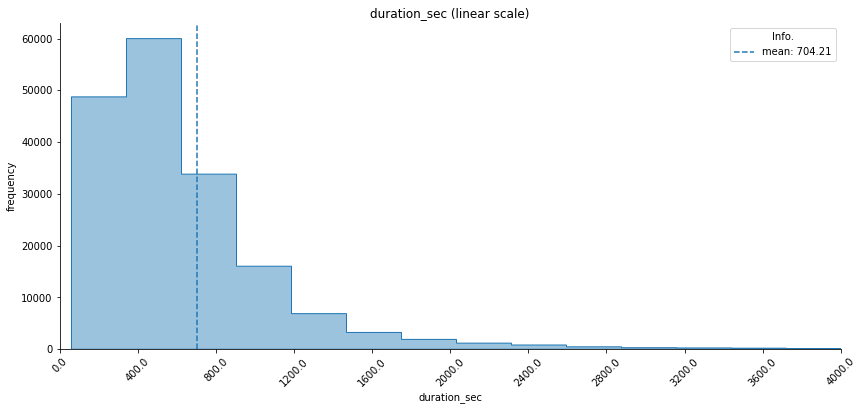

In [34]:
plt_hist_uni(df['duration_sec'],xlim=(0,4000),bins=300)

In [35]:
(df['duration_sec'] <= 60*60).mean() * 100

99.20638092573667

* here we can notice that 99.2% of all trips durations is one hour or less.

In [36]:
(df['duration_sec'] <= 30*60).mean() * 100

96.55432294015884

* 96.55% of all trips durations is half an hour or less.

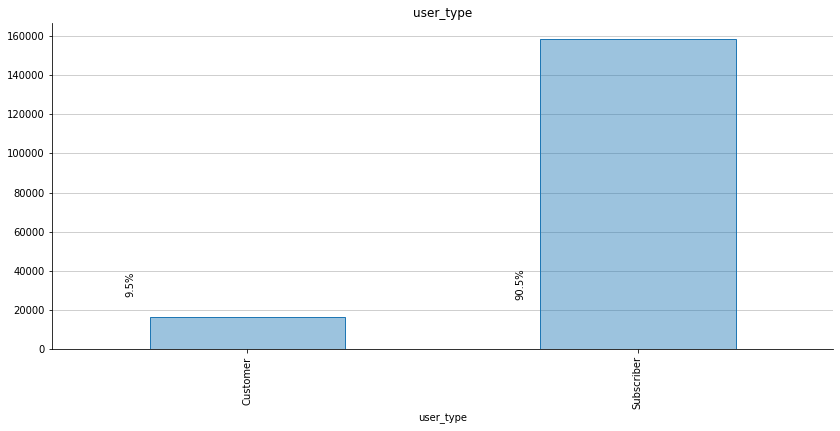

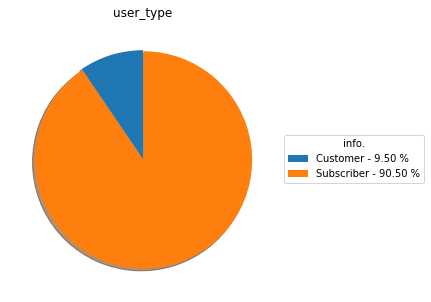

In [37]:
bar_plot_uni(df['user_type'],figsize=(14,6))
pie_plot(df['user_type'])

* the proportion of the bike share service users who are customers is approximately 9.5%
* the proportion of the bike share service users who are subscribers is approximately 90.5%

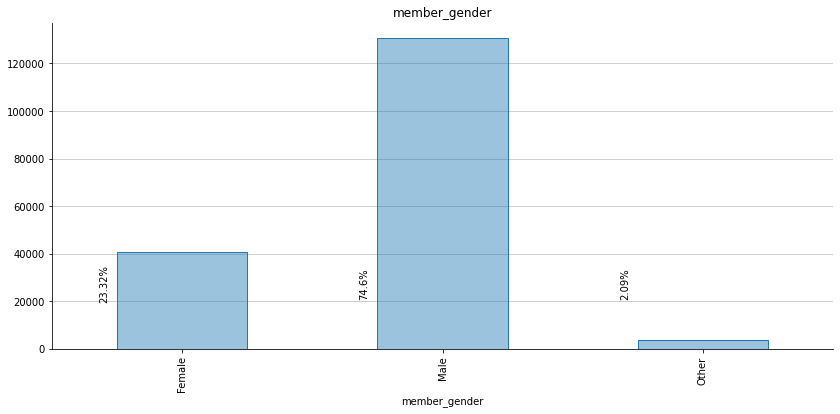

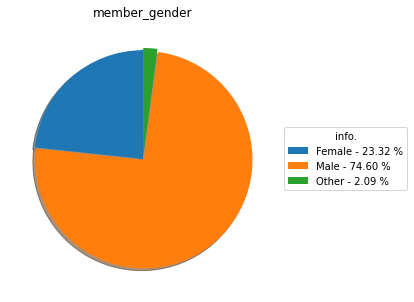

In [38]:
bar_plot_uni(df['member_gender'],figsize=(14,6))
pie_plot(df['member_gender'])

* the proportion of the bike share service users who are males is approximately 74.6%
* the proportion of the bike share service users who are females is approximately 23.32%
* the proportion of the bike share service users who are other gender is approximately 2.09%

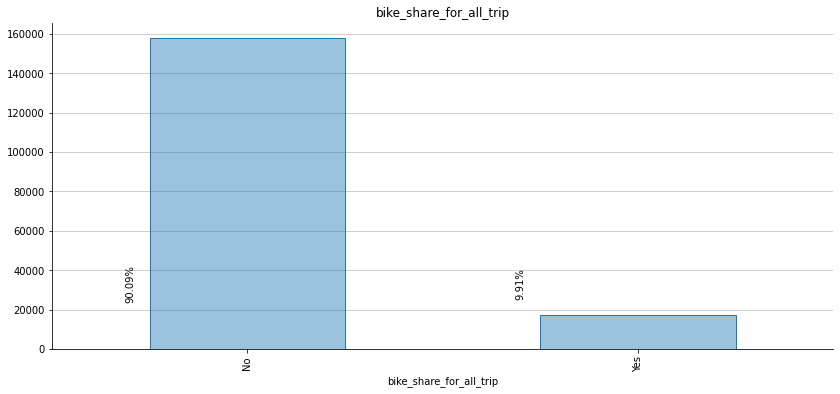

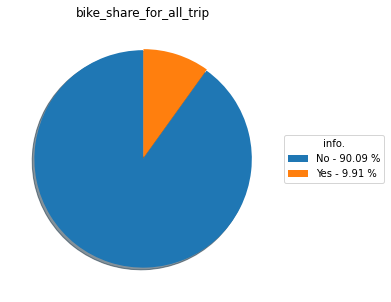

In [39]:
bar_plot_uni(df['bike_share_for_all_trip'],figsize=(14,6))
pie_plot(df['bike_share_for_all_trip'])

* the proportion of members who are enrolled in the [Bike Share for All](https://www.fordgobike.com/pricing/bikeshareforall) program for low-income residents is approximately 9.91%
* the proportion of members who are not enrolled in the [Bike Share for All](https://www.fordgobike.com/pricing/bikeshareforall) program for low-income residents is approximately 90.09%

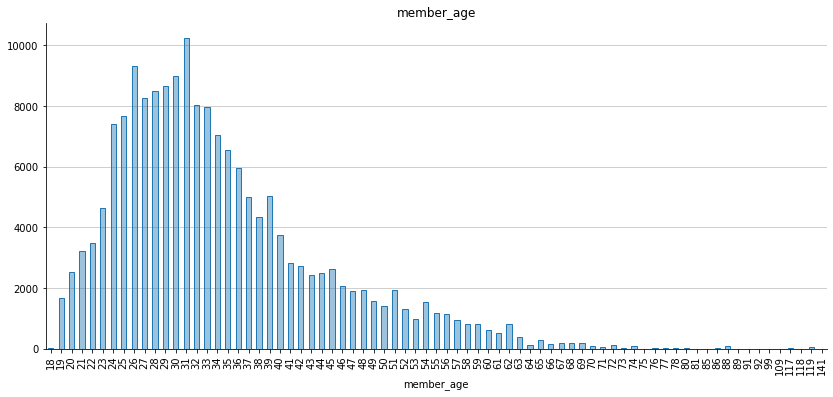

In [40]:
bar_plot_uni(df['member_age'],figsize=(14,6),percentages=False)

* we can notice that all members are adults or +18.
* we can notice the increase of members count as it approach age of 31 then it begin to decraese.

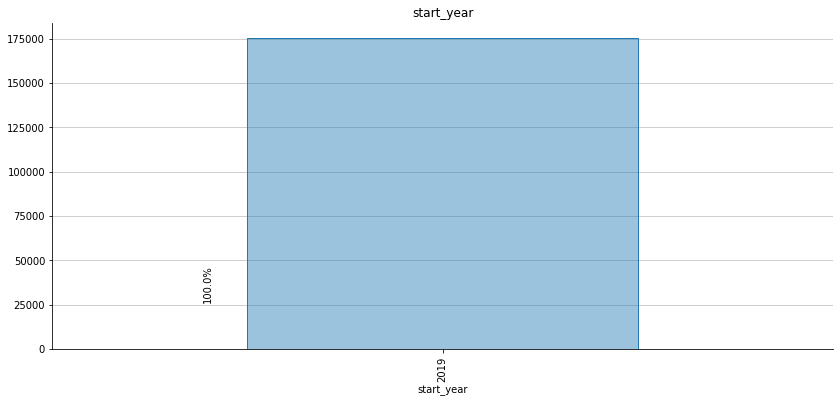

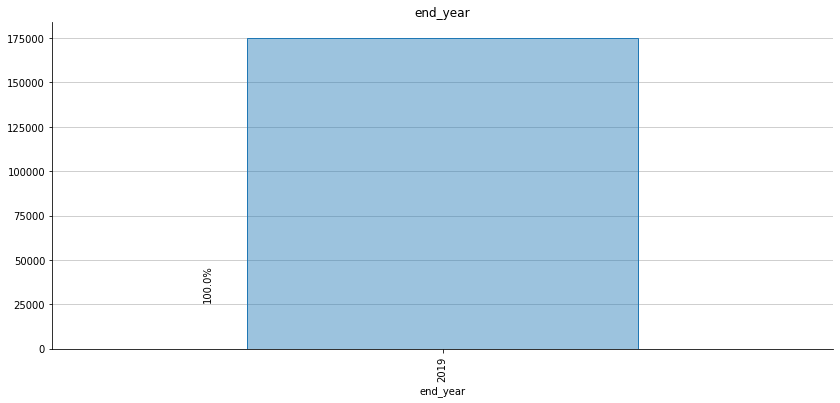

In [41]:
bar_plot_uni(df['start_year'],figsize=(14,6))
bar_plot_uni(df['end_year'],figsize=(14,6))

* we notice that all the data is collected during the year 2019

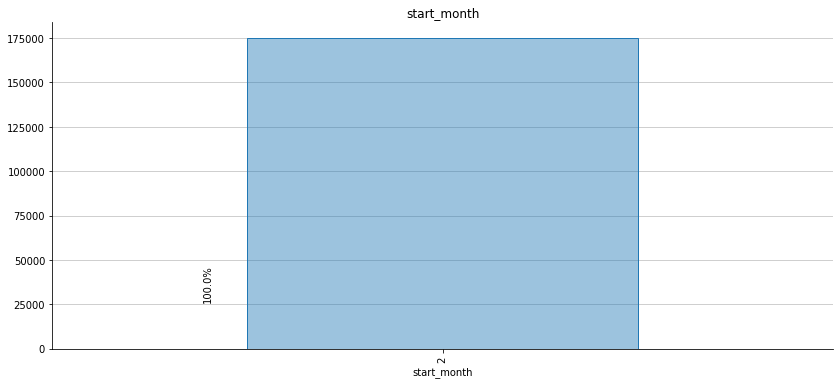

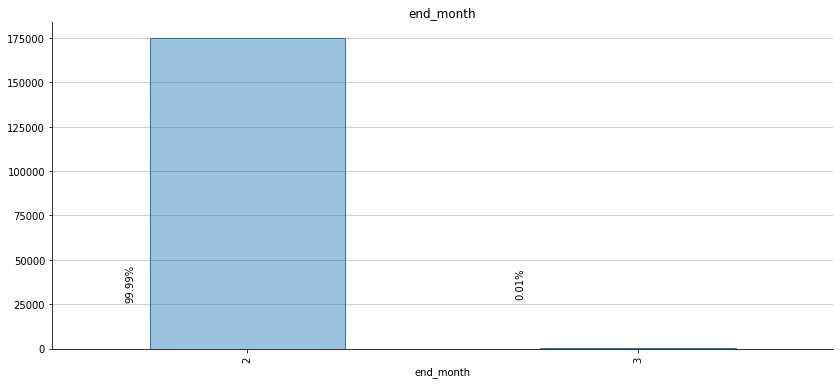

In [42]:
bar_plot_uni(df['start_month'],figsize=(14,6))
bar_plot_uni(df['end_month'],figsize=(14,6))

* we notice that all the data is collected during the 2nd month of 2019
* some of the members who started the trip on late february 28th ended the trip in march 1st

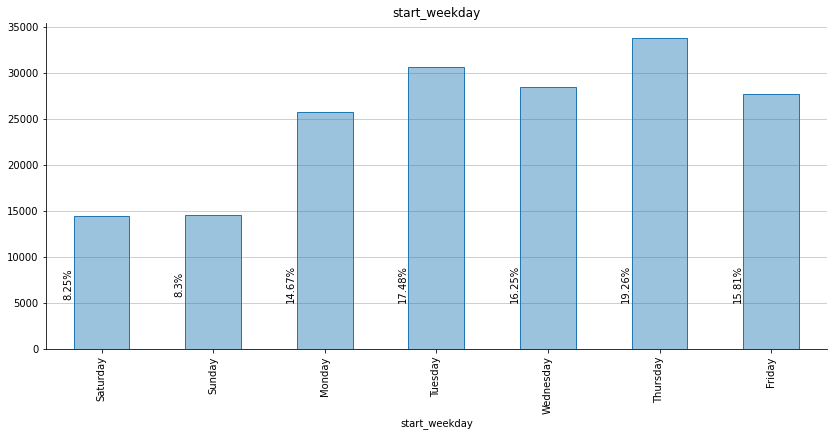

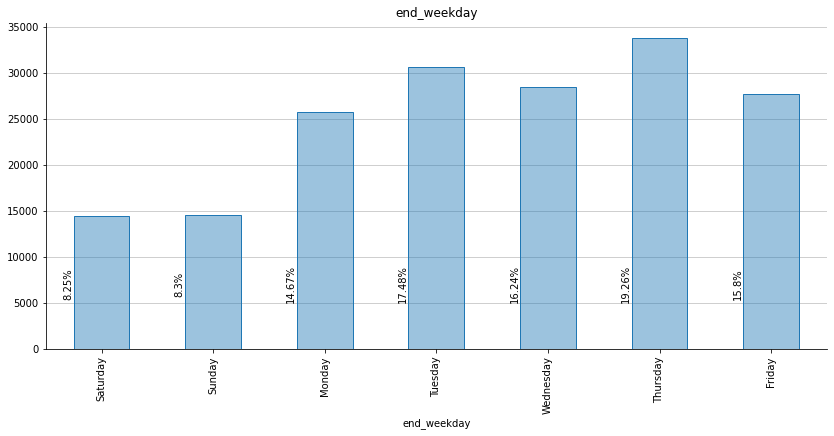

In [43]:
order = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
bar_plot_uni(df['start_weekday'],figsize=(14,6),order=order)
bar_plot_uni(df['end_weekday'],figsize=(14,6),order=order)

* the distributions of `start_weekday` and `end_weekday` are almost the same since 99.2% of the trips are one hour or less long.
* the trips count on the weekend (Saturday and Sunday since the data is from the USA) is almost the half of the trips count on the weekdays.

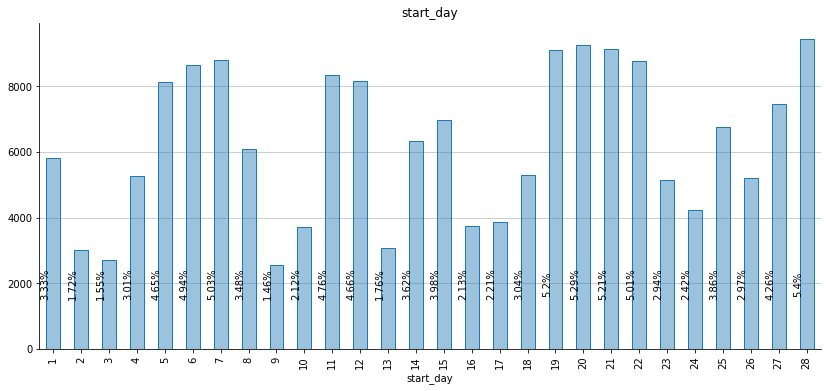

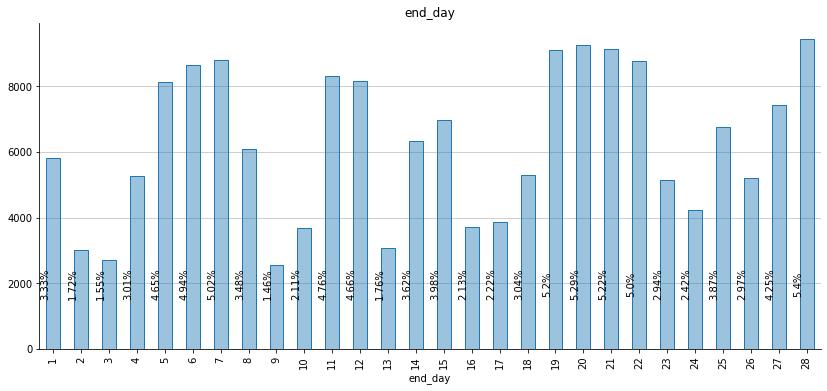

In [44]:
bar_plot_uni(df['start_day'],figsize=(14,6))
bar_plot_uni(df['end_day'],figsize=(14,6))

* the distributions of `start_day` and `end_day` are almost the same since 99.2% of the trips are one hour or less long.
* we can notice the pattern of weekend and weekdays during the month from the peaks and valleys.

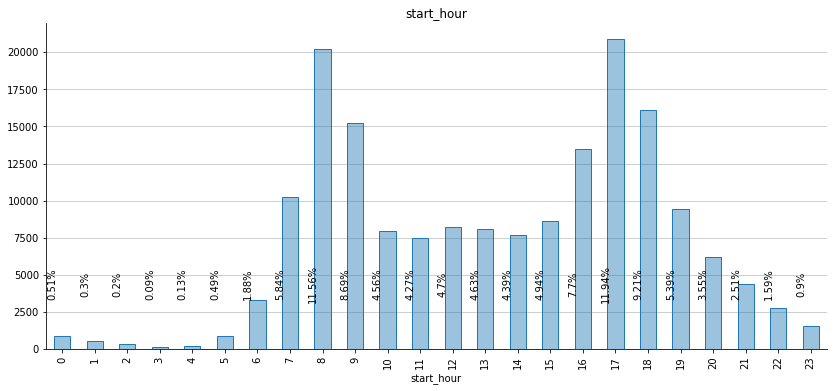

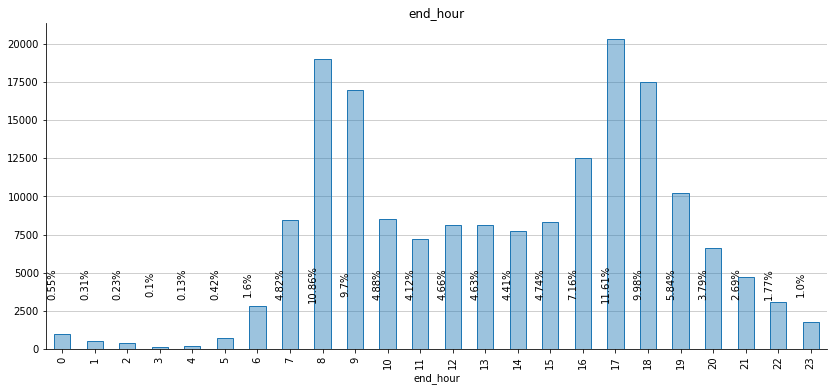

In [45]:
bar_plot_uni(df['start_hour'],figsize=(14,6))
bar_plot_uni(df['end_hour'],figsize=(14,6))

* the distributions of `start_hour` and `end_hour` are almost the same since 99.2% of the trips are one hour or less long.
* since the traditional USA business hours are 9:00 AM to 5:00 PM we can notice the increase of trips count around the start and end of business hours.

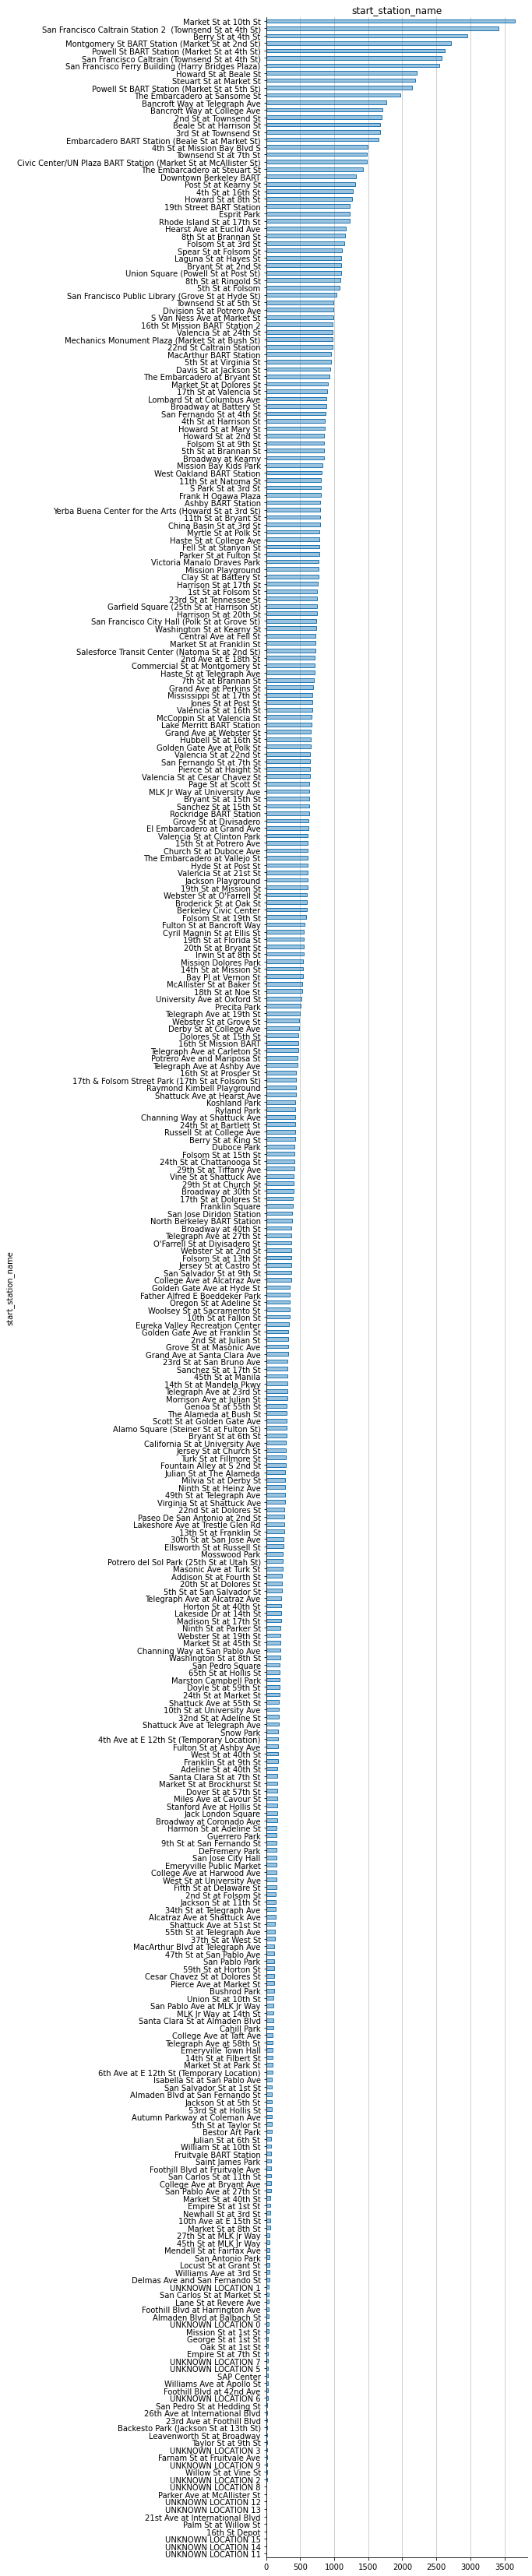

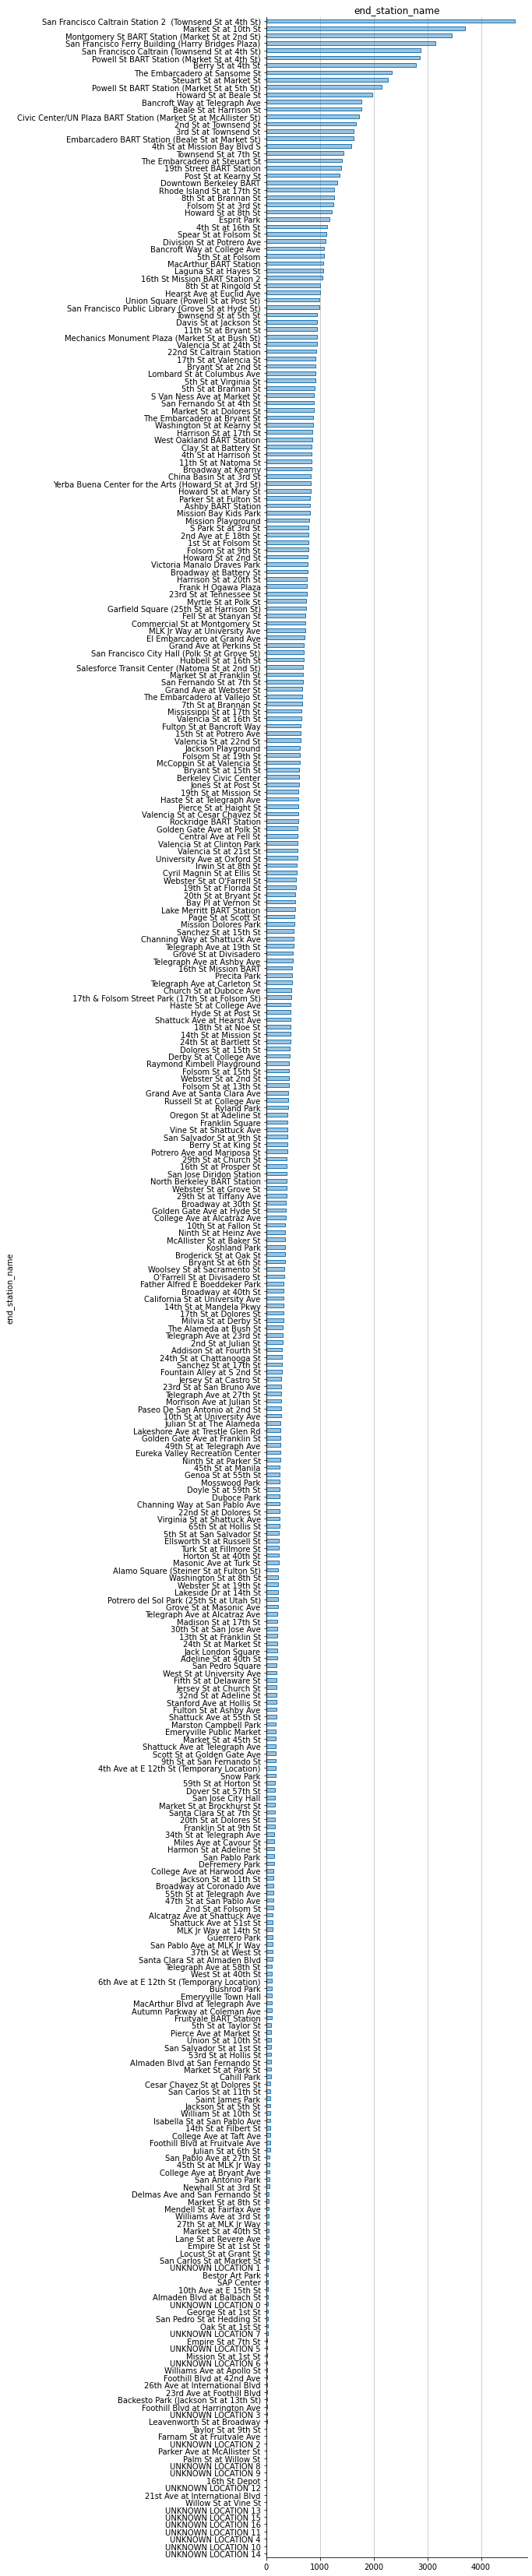

In [46]:
bar_plot_uni(df['start_station_name'],figsize=(6,60),vert=True,percentages=False,order='total')
bar_plot_uni(df['end_station_name'],figsize=(6,60),vert=True,percentages=False,order='total')

In [47]:
symmetric_difference(df['end_station_name'].value_counts()[:11].index,df['start_station_name'].value_counts()[:11].index)

array([], dtype=float64)

* by getting the symmetric difference of most used start/end stations we can conclude that the trip is usually away and back to same start station.

## 2. Bivariate Exploration

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_station_id         175147 non-null  int64  
 2   start_station_name       175147 non-null  object 
 3   start_station_latitude   175147 non-null  float64
 4   start_station_longitude  175147 non-null  float64
 5   end_station_id           175147 non-null  int64  
 6   end_station_name         175147 non-null  object 
 7   end_station_latitude     175147 non-null  float64
 8   end_station_longitude    175147 non-null  float64
 9   bike_id                  175147 non-null  int64  
 10  user_type                175147 non-null  object 
 11  member_gender            175147 non-null  object 
 12  bike_share_for_all_trip  175147 non-null  object 
 13  member_age               175147 non-null  int64  
 14  star

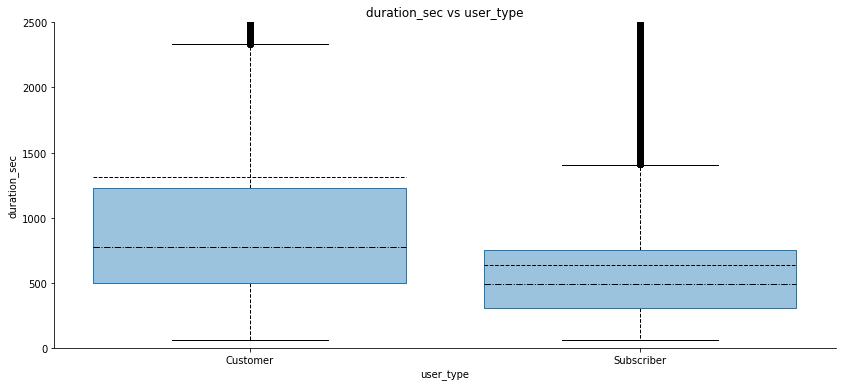

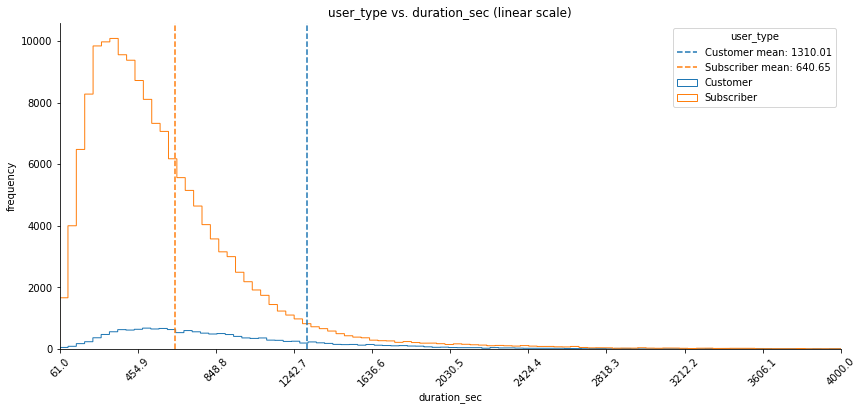

In [49]:
box_plot(df,'user_type','duration_sec',ylim=(0,2500))
plt_hist(df['user_type'],df['duration_sec'],bins=2000,scale='linear',xlim=(61,4000),histtype='step')

* we can notice from the boxplot that customers has longer trip durations on average than subscribers has.

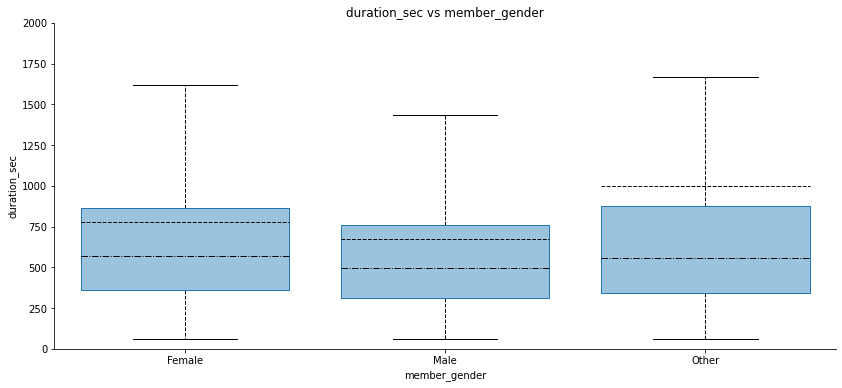

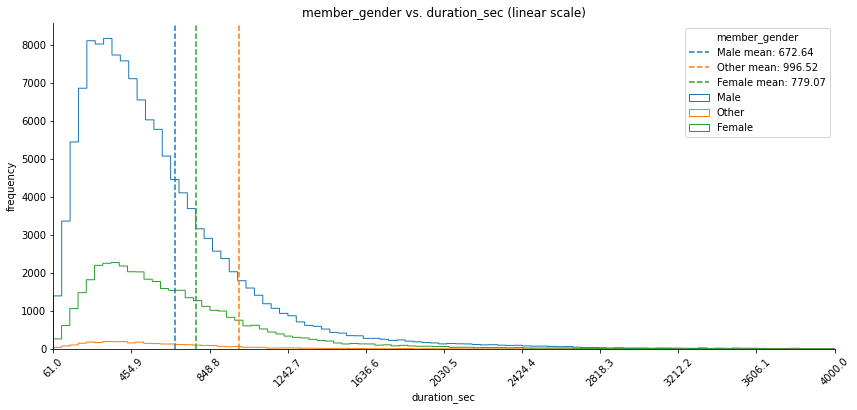

In [50]:
box_plot(df,'member_gender','duration_sec',ylim=(0,2000),showfliers=False)
plt_hist(df['member_gender'],df['duration_sec'],bins=2000,scale='linear',xlim=(61,4000),histtype='step')

* we can  notice that males has the shortest trip durations on average in compare with females and other genders.

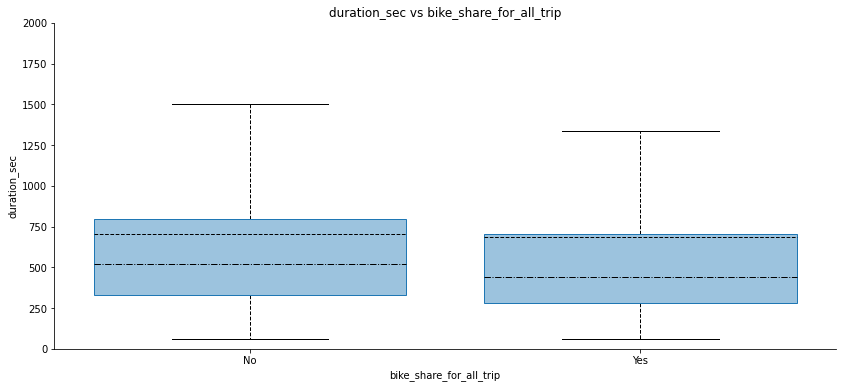

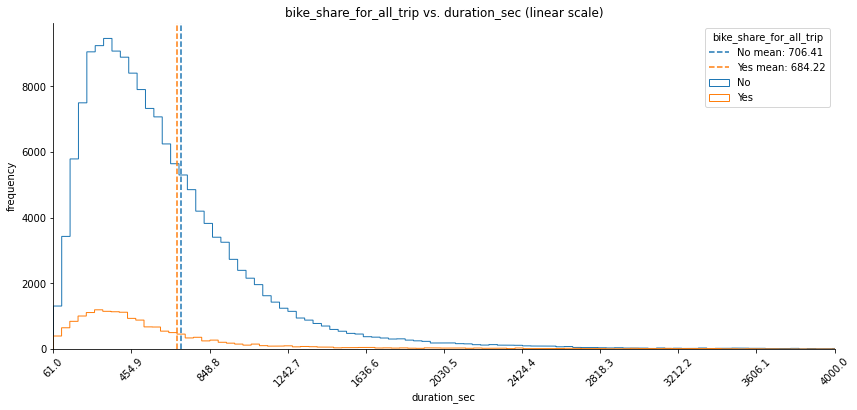

In [51]:
box_plot(df,'bike_share_for_all_trip','duration_sec',ylim=(0,2000),showfliers=False)
plt_hist(df['bike_share_for_all_trip'],df['duration_sec'],bins=2000,scale='linear',xlim=(61,4000),histtype='step')

* we can notice from the close mean values that being enrolled in Bike Share For All program does not affect trip duration.

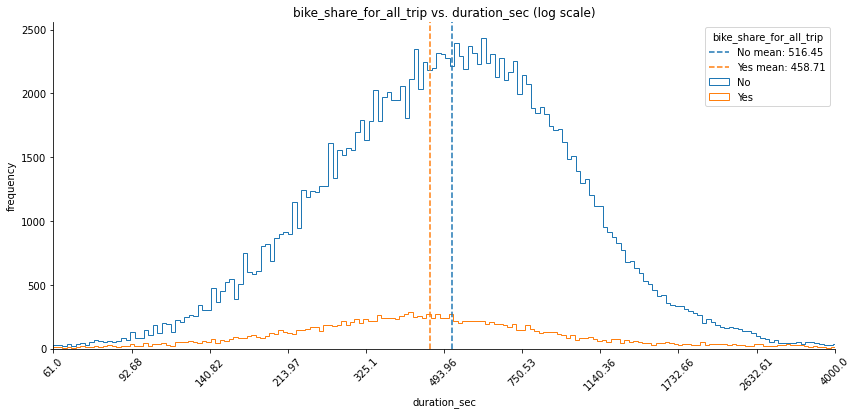

In [52]:
plt_hist(df['bike_share_for_all_trip'],df['duration_sec'],bins=300,scale='log',xlim=(61,4000),histtype='step')

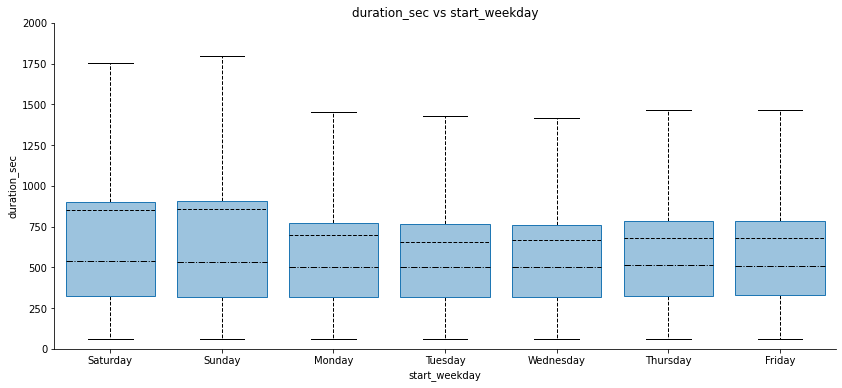

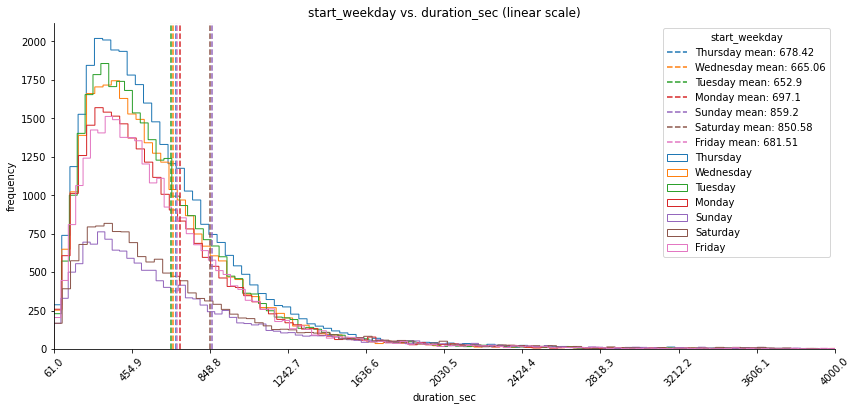

In [53]:
order = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
box_plot(df,'start_weekday','duration_sec',ylim=(0,2000),showfliers=False,order = order)
plt_hist(df['start_weekday'],df['duration_sec'],bins=2000,scale='linear',xlim=(61,4000),histtype='step')

* the weekends has longer trip durations on average in compare with weekdays

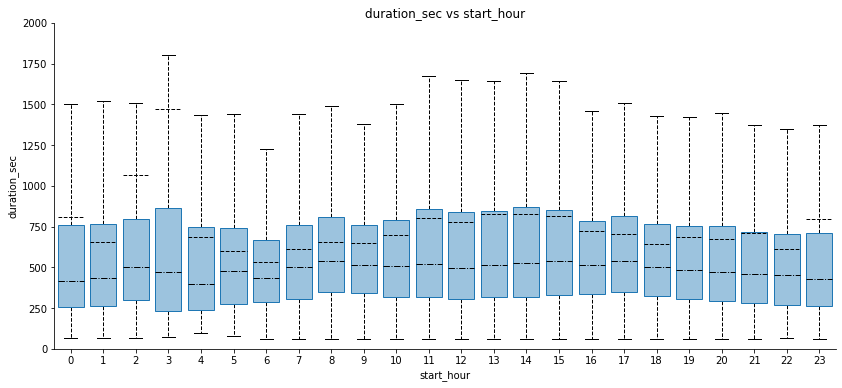

In [54]:
box_plot(df,'start_hour','duration_sec',ylim=(0,2000),showfliers=False)

* when comparing means we notice that trip durations near the start and the end of business hours (9:00 AM,5:00 PM) are shorter.
* the frist hours of the day has the longest trip durations

## 3. Multivariate Exploration

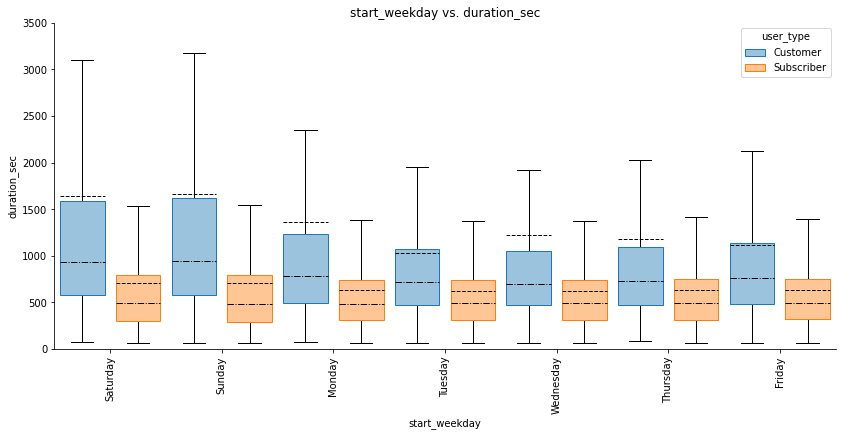

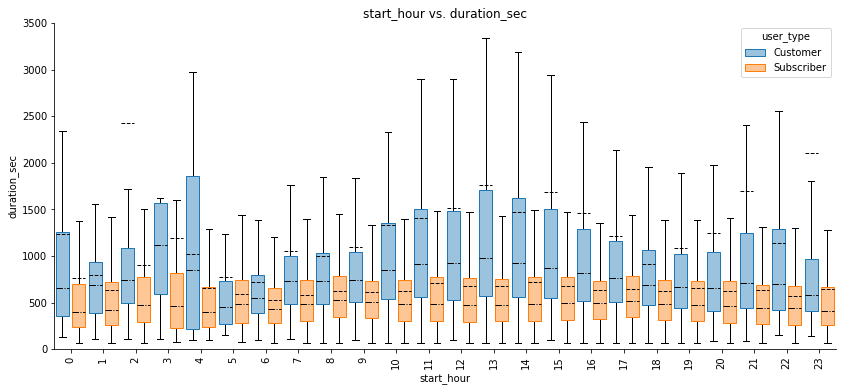

In [55]:
order = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
box_plot_multi(df,'start_weekday','duration_sec','user_type',ylim=(0,3500),showfliers=False,order=order)
box_plot_multi(df,'start_hour','duration_sec','user_type',ylim=(0,3500),showfliers=False)

* the subscribers trip durations are almost consistent through all week days, while customers trip durations increases on weekend.
* the subscribers trip durations are almost consistent through day hours, while customers trip durations increases during business hours and at the early hours of the day.
* we conclude that customers and subscribers uses the service for different purposes

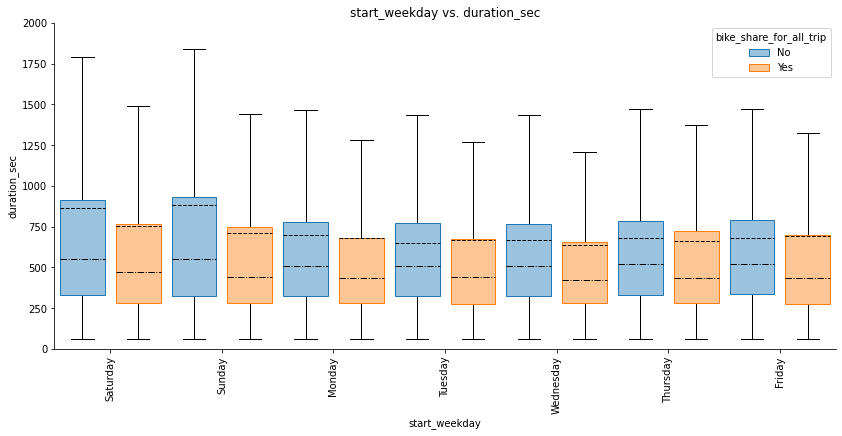

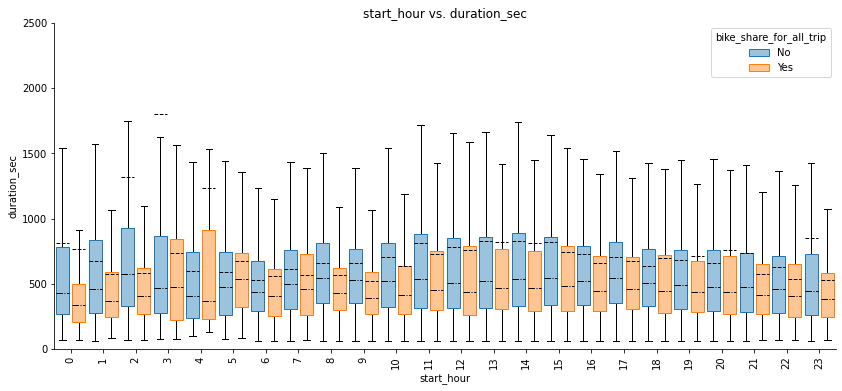

In [56]:
order = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
box_plot_multi(df,'start_weekday','duration_sec','bike_share_for_all_trip',ylim=(0,2000),showfliers=False,order=order)
box_plot_multi(df,'start_hour','duration_sec','bike_share_for_all_trip',ylim=(0,2500),showfliers=False)

* seems like the enrollment in Bike Share For All program does not effect trip duration

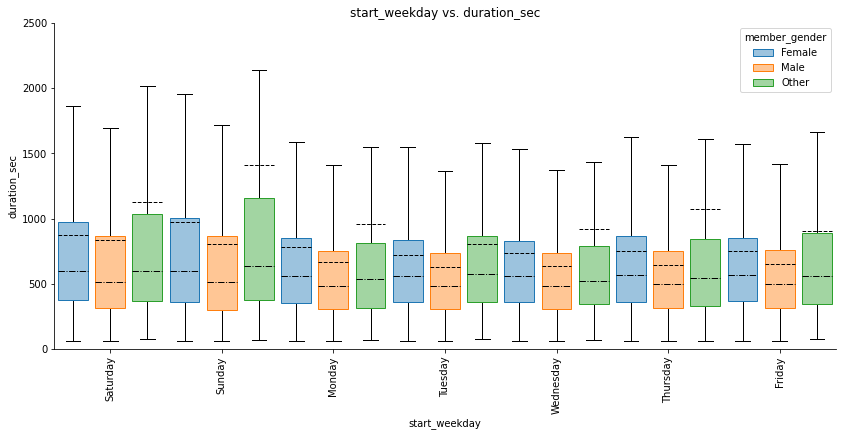

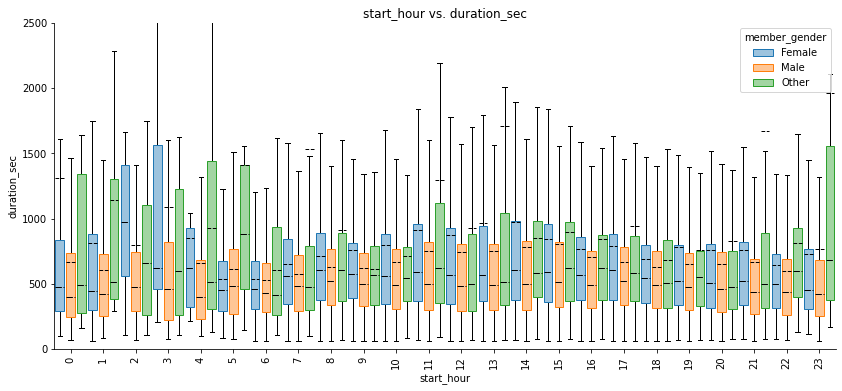

In [57]:
order = ['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
box_plot_multi(df,'start_weekday','duration_sec','member_gender',ylim=(0,2500),showfliers=False,order=order)
box_plot_multi(df,'start_hour','duration_sec','member_gender',ylim=(0,2500),showfliers=False)

* the males trip durations are almost consistent through all day hours, while females and other genders trip durations remarkably increases at early hours of the day.

# Conclusions

## 1. Results
* customers has longer trip durations on average than subscribers has.
* males has the shortest trip durations on average in compare with females and other genders.
* the weekends has longer trip durations on average in compare with weekdays
* trip durations near the start and the end of business hours (9:00 AM,5:00 PM) are shorter.
* the frist hours of the day has the longest trip durations
* the subscribers trip durations are almost consistent through all week days, while customers trip durations increases on weekend.
* the subscribers trip durations are almost consistent through day hours, while customers trip durations increases during business hours and at the early hours of the day.
* customers and subscribers uses the service for different purposes
* the males trip durations are almost consistent through all day hours, while females and other genders trip durations remarkably increases at early hours of the day.

## 2. Limitations
* the dataset collection is limited on 2019 year and San Francisco Bay area maybe adding previous years and other geographical areas change the result.
